In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [17]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)


In [18]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=25,
                    validation_data=(x_test, y_test))


Epoch 1/25
782/782 [==============================] - 14s 17ms/step - loss: 1.9008 - accuracy: 0.2901 - val_loss: 1.4879 - val_accuracy: 0.4562
Epoch 2/25
782/782 [==============================] - 14s 17ms/step - loss: 1.6194 - accuracy: 0.4093 - val_loss: 1.3357 - val_accuracy: 0.5120
Epoch 3/25
782/782 [==============================] - 14s 18ms/step - loss: 1.4846 - accuracy: 0.4657 - val_loss: 1.2874 - val_accuracy: 0.5399
Epoch 4/25
782/782 [==============================] - 14s 17ms/step - loss: 1.4099 - accuracy: 0.4981 - val_loss: 1.1452 - val_accuracy: 0.5887
Epoch 5/25
782/782 [==============================] - 13s 17ms/step - loss: 1.3455 - accuracy: 0.5226 - val_loss: 1.1503 - val_accuracy: 0.5894
Epoch 6/25
782/782 [==============================] - 13s 17ms/step - loss: 1.3042 - accuracy: 0.5379 - val_loss: 1.0465 - val_accuracy: 0.6290
Epoch 7/25
782/782 [==============================] - 13s 17ms/step - loss: 1.2692 - accuracy: 0.5544 - val_loss: 1.0272 - val_accuracy:

1/1 [==============================] - 0s 24ms/step


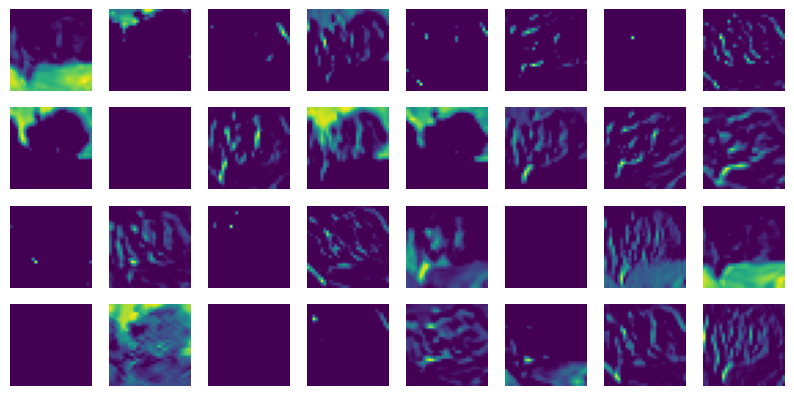

In [20]:
layer_outputs = [layer.output for layer in model.layers[:4]]  # First 4 layers
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

sample_image = x_test[0].reshape(1, 32, 32, 3)
activations = activation_model.predict(sample_image)

plt.figure(figsize=(10, 10))
for i in range(activations[0].shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


1/1 [==============================] - 0s 36ms/step


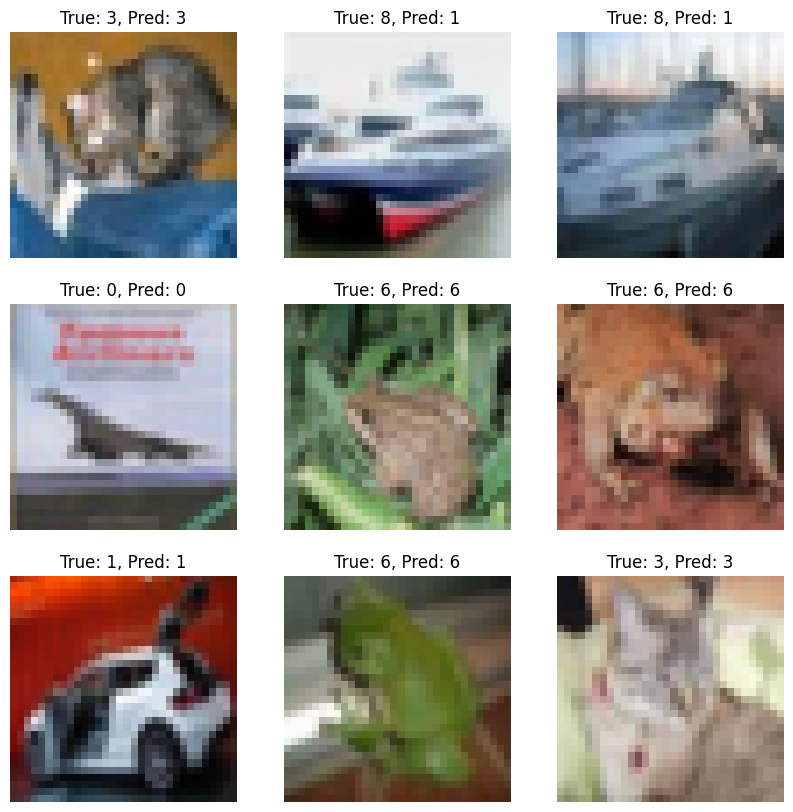

In [23]:
import numpy as np

def plot_predictions(images, true_labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels[i]}, Pred: {predictions[i]}")
        plt.axis('off')
    plt.show()

predictions = np.argmax(model.predict(x_test[:9]), axis=1)
true_labels = np.argmax(y_test[:9], axis=1)

plot_predictions(x_test[:9], true_labels, predictions)


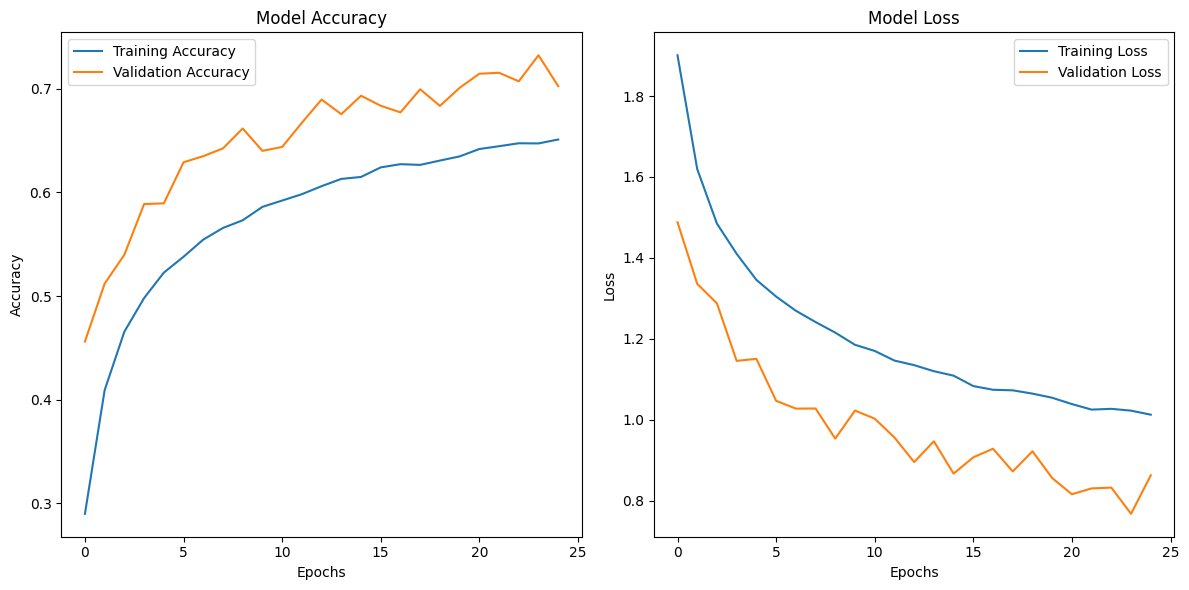

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 27ms/step


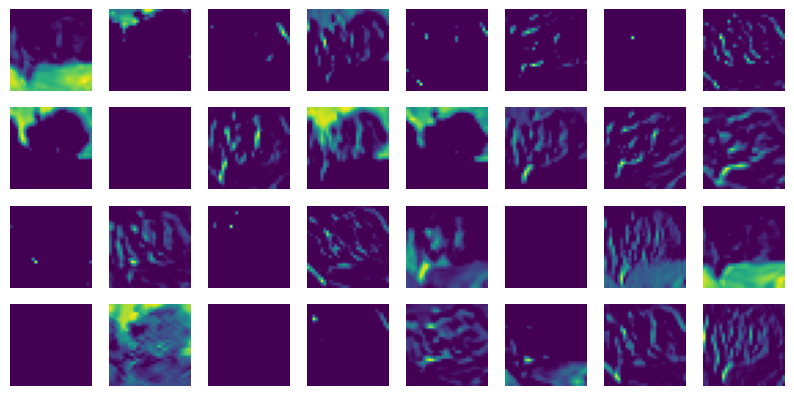

In [26]:
layer_outputs = [layer.output for layer in model.layers[:4]]  # First 4 layers
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

sample_image = x_test[0].reshape(1, 32, 32, 3)
activations = activation_model.predict(sample_image)

plt.figure(figsize=(10, 10))
for i in range(activations[0].shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


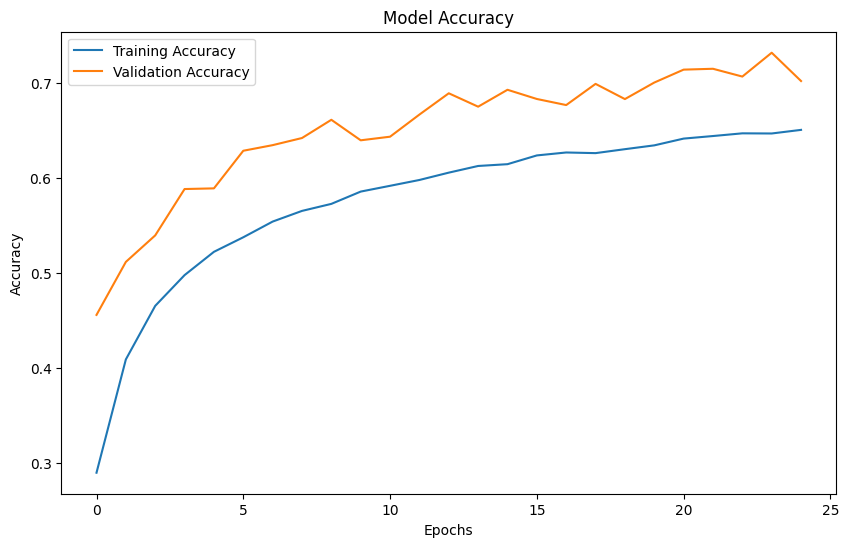

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 0s - loss: 0.8624 - accuracy: 0.7024 - 488ms/epoch - 2ms/step
Test Accuracy: 70.24%


313/313 [==============================] - 1s 2ms/step


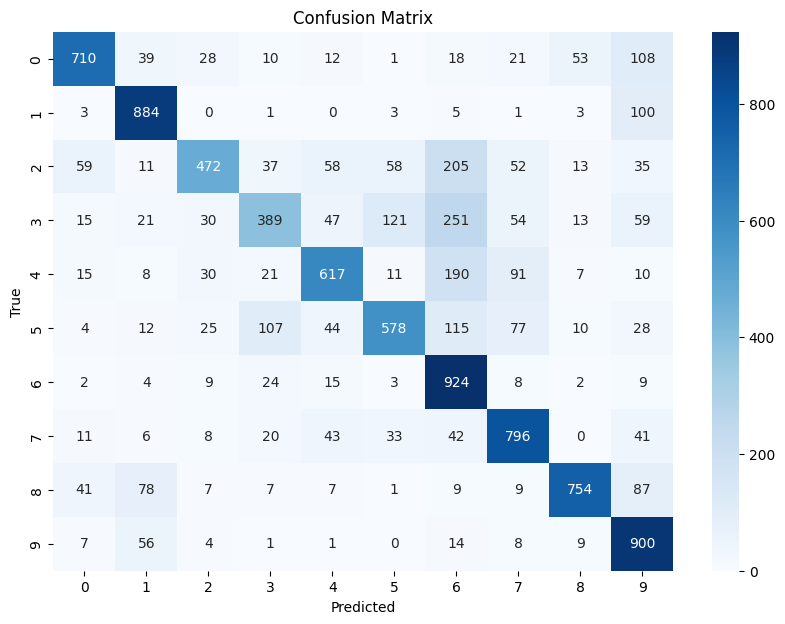

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
